## AnyTrading environment for reinforcement learning

### https://github.com/AminHP/gym-anytrading

* Trading Actions: only Sell=0 and Buy=1
* Trading Positions:  only Short=0 and Long=1

In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5 MB 7.8 kB/s 
     |████████████████████████████████| 412.3 MB 28 kB/s 
     |████████████████████████████████| 240 kB 67.4 MB/s 
     |████████████████████████████████| 171 kB 72.7 MB/s 
     |████████████████████████████████| 503 kB 64.7 MB/s 
     |████████████████████████████████| 50 kB 8.4 MB/s 
     |████████████████████████████████| 3.8 MB 56.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=b9e2b86149f21d77c6583cc8e1b4b9abcdf2edd6cfe8e33917c3811a96b6c113
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorb

In [2]:
# Importing Dependencies
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# fetch datasets

In [3]:
#!wget -O trade.csv "https://query1.finance.yahoo.com/v7/finance/download/DOGE-USD?period1=1597520308&period2=1629056308&interval=1d&events=history&includeAdjustedClose=true"

--2021-08-16 13:34:24--  https://query1.finance.yahoo.com/v7/finance/download/DOGE-USD?period1=1597520308&period2=1629056308&interval=1d&events=history&includeAdjustedClose=true
Resolving query1.finance.yahoo.com (query1.finance.yahoo.com)... 69.147.80.15, 69.147.80.12, 2001:4998:64:800::6000, ...
Connecting to query1.finance.yahoo.com (query1.finance.yahoo.com)|69.147.80.15|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2021-08-16 13:34:24 ERROR 403: Forbidden.



In [4]:
#loading our dataset
file="/content/DOGE-USD.csv"
df = pd.read_csv(file)

In [5]:
#viewing first 5 columns
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-15,0.003563,0.003607,0.003500,0.003539,0.003539,64309678.0
1,2020-08-16,0.003540,0.003552,0.003469,0.003524,0.003524,52637926.0
2,2020-08-17,0.003524,0.003718,0.003500,0.003591,0.003591,77628715.0
3,2020-08-18,0.003593,0.003709,0.003483,0.003514,0.003514,62570291.0
4,2020-08-19,0.003508,0.003538,0.003368,0.003424,0.003424,53306857.0


In [6]:
#converting Date Column to DateTime Type
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [7]:
#setting the column as index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-15,0.003563,0.003607,0.003500,0.003539,0.003539,64309678.0
2020-08-16,0.003540,0.003552,0.003469,0.003524,0.003524,52637926.0
2020-08-17,0.003524,0.003718,0.003500,0.003591,0.003591,77628715.0
2020-08-18,0.003593,0.003709,0.003483,0.003514,0.003514,62570291.0
2020-08-19,0.003508,0.003538,0.003368,0.003424,0.003424,53306857.0


In [8]:
#passing the data and creating our environment
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [9]:
env.signal_features

array([[ 3.539e-03,  0.000e+00],
       [ 3.524e-03, -1.500e-05],
       [ 3.591e-03,  6.700e-05],
       [ 3.514e-03, -7.700e-05],
       [ 3.424e-03, -9.000e-05],
       [ 3.459e-03,  3.500e-05],
       [ 3.393e-03, -6.600e-05],
       [ 3.442e-03,  4.900e-05],
       [ 3.414e-03, -2.800e-05],
       [ 3.418e-03,  4.000e-06],
       [ 3.305e-03, -1.130e-04],
       [ 3.303e-03, -2.000e-06],
       [ 3.203e-03, -1.000e-04],
       [ 3.268e-03,  6.500e-05],
       [ 3.282e-03,  1.400e-05],
       [ 3.300e-03,  1.800e-05],
       [ 3.221e-03, -7.900e-05],
       [ 3.256e-03,  3.500e-05],
       [ 3.122e-03, -1.340e-04],
       [ 2.802e-03, -3.200e-04],
       [ 2.899e-03,  9.700e-05],
       [ 2.758e-03, -1.410e-04],
       [ 2.787e-03,  2.900e-05],
       [ 2.811e-03,  2.400e-05],
       [ 2.756e-03, -5.500e-05],
       [ 2.779e-03,  2.300e-05],
       [ 2.805e-03,  2.600e-05],
       [ 2.806e-03,  1.000e-06],
       [ 2.819e-03,  1.300e-05],
       [ 2.776e-03, -4.300e-05],
       [ 2

In [10]:
env.action_space

Discrete(2)

info {'total_reward': 0.0006179999999999996, 'total_profit': 0.8713047172273888, 'position': 1}


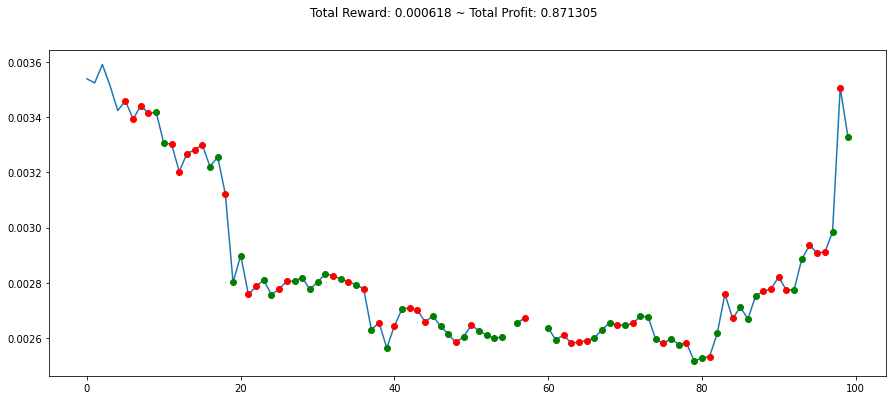

In [11]:
#running the test environment
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [12]:
#setting up our environment for training 
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [13]:
#Applying the Trading RL Algorithm
model = A2C('MlpLstmPolicy', env, verbose=1) 

#setting the learning timesteps
model.learn(total_timesteps=1000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -0.322   |
| fps                | 5        |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 1.12e-09 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 234      |
| nupdates           | 100      |
| policy_entropy     | nan      |
| total_timesteps    | 500      |
| value_loss         | nan      |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 285     

In [14]:
#Setting up the Agent Environment
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 1.0, 'position': 0}


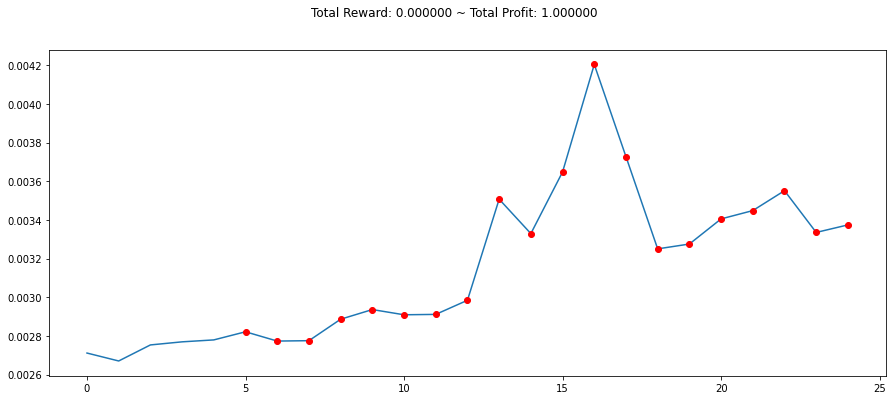

In [15]:
#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()